## Aproksymacja 

Jako źródło danych proszę wykorzystać te same funkcje i te same zbiory danych jakie były używane w ćwiczeniach dotyczących interpolacji. 

### Zadanie 1. Aproksymacja średniokwadratowa (Least-squares polynomial approximation)
Proszę samodzielnie zaimplementować algorytm aproksymacji wielomianowej średniokwadratowej.  
Dla wszystkich zbiorów danych proszę wykonać odpowiednie wykresy oraz oszacować błąd aproksymacji. 
Testy przeprowadzić dla stopni wielomianów od 1 (regresja liniowa) do n-1. 
Proszę zwięźle podsumować wyniki i podać wnioski co do wyboru najlepszych parametrów aproksymacji. 

Sinus function for 1/3/5 degree
Estimated error is :  0.922010346289766
Estimated error is :  1.03954036795600
Estimated error is :  1.04021586490844
Sqrt function for 1/3/5 degree
Estimated error is :  0.0841971746178101
Estimated error is :  0.0390981402813654
Estimated error is :  0.0391137157539958
Polynomial function for 1/3/5 degree
Estimated error is :  5.58764799462485
Estimated error is :  4.41903333484521e-14
Estimated error is :  2.51807935705423e-14


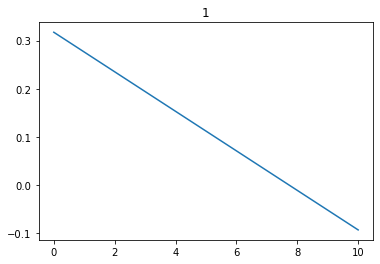

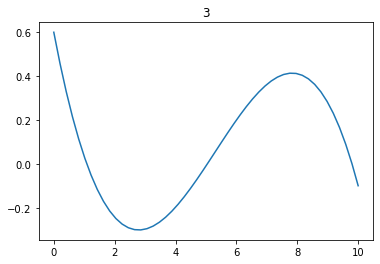

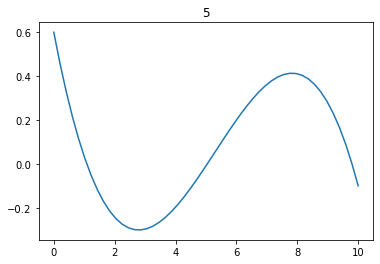

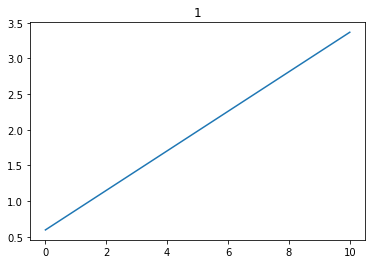

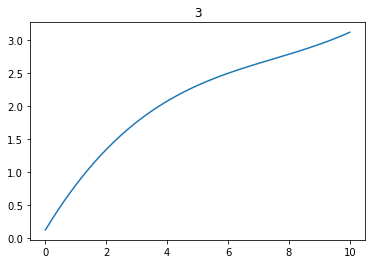

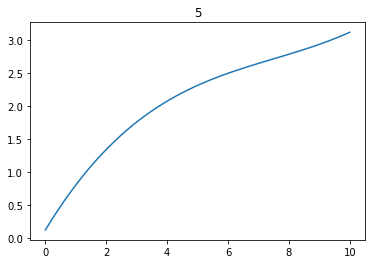

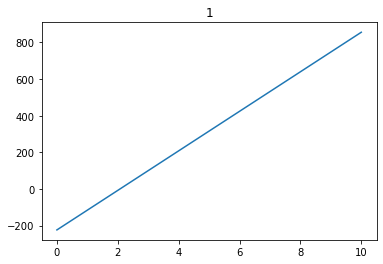

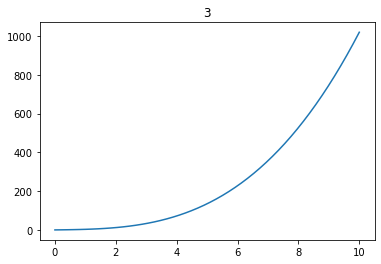

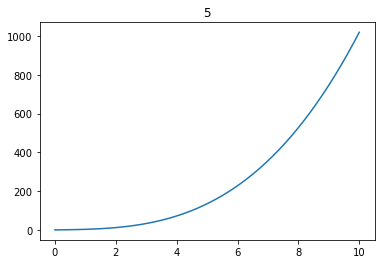

In [24]:
import math
import numpy as np
import sympy
from tabulate import tabulate
import matplotlib.pyplot as plt
def squareApproximation(x_array, y_array, M):
    N = len(x_array)
    array = [0] * (2 * M + 1)
    helper = np.zeros(M + 1)
    matrix = np.zeros((M + 1, M + 1))
    for i in range(M + 1):
        sum = 0
        for j in range(N):
            sum += (pow(x_array[j], i) * y_array[j])
        helper[i] = sum
    for i in range(2 * M + 1):
        sum = 0
        for j in range(N):
            sum += pow(x_array[j], i)
        array[i] = sum
    for i in range(M + 1):
        for j in range(M + 1):
            matrix[i][j] = array[i + j]
    A_tab = np.linalg.solve(matrix, helper)
    poly = 0
    X = sympy.symbols('x')
    for i in range(M + 1):
        poly += pow(X, i) * A_tab[i]
    return sympy.simplify(poly)


def calculate(polynomial, x):
    X = sympy.symbols('x')
    return polynomial.evalf(subs={X: x})

#Parametrs
xs_sin = np.array([0,1,3,5,6,7,8,9,11])
ys_sin = []
for x in xs_sin:
    ys_sin.append(np.sin(x))
    
xs_sqrt = np.array([0,1,3,5,6,7,8,9,11])
ys_sqrt = []
for x in xs_sqrt:
    ys_sqrt.append(np.sqrt(x)) 
    
xs_add_pow = np.array([0,1,3,5,6,7,8,9,11])
ys_add_pow = []
for x in xs_add_pow:
    y=np.power(x,3)+(2*x) 
    ys_add_pow.append(y)
    
def show(xs,ys,degree):
    tmp=squareApproximation(xs, ys, degree)
    polynomial=lambda x:calculate(tmp,x);
    x_array = np.linspace(0,10,num=50)
    y_array = []
    error=[]
    for i in range(0,len(ys)):
        if ys[i]!=0 :error.append(abs(polynomial(xs[i])-ys[i])/abs(ys[i]));
    print("Estimated error is : ",np.sum(error)/len(error))
    for i in range(0,len(x_array)):
        y_array.append(polynomial(x_array[i]))
    plt.title(degree)
    plt.plot(x_array,y_array)
    plt.show()
   

#Wykresy
print("Sinus function for 1/3/5 degree")
show(xs_sin, ys_sin,1)
show(xs_sin, ys_sin,3)
show(xs_sin, ys_sin,5)
print("Sqrt function for 1/3/5 degree")
show(xs_sqrt, ys_sqrt,1)
show(xs_sqrt, ys_sqrt,3)
show(xs_sqrt, ys_sqrt,5)
print("Polynomial function for 1/3/5 degree")
show(xs_add_pow, ys_add_pow,1)
show(xs_add_pow, ys_add_pow,3)
show(xs_add_pow, ys_add_pow,5)

### Dodatkowo jako dodatkowe źródło danych proszę wykorzystać publicznie dostępne dane o koronawirusie 
Kraj proszę wybrać samodzielnie. Celem tego zadania będzie więc określenie funkcji nalepiej przybliżającej wzrost zachorowań. 

### Zadanie 2 Aproksymacja średniokwadratowa w Python (numpy, scipy)
Proszę znaleźć i wykorzystać do aproksymacji tych samych danych funkcje dostępne w bibliotekach numerycznych Python. 


Sinus function for 1/3/5 degree
Estimated error is :  0.11291544903357409
Estimated error is :  0.3085498882019178
Estimated error is :  0.37709080890419205
Sqrt function for 1/3/5 degree
Estimated error is :  0.08419717461780987
Estimated error is :  0.03909814028136015
Estimated error is :  0.009388189599666114
Polynomial function for 1/3/5 degree
Estimated error is :  5.5876479946248505
Estimated error is :  1.4830307416266438e-14
Estimated error is :  2.9189556615518267e-15


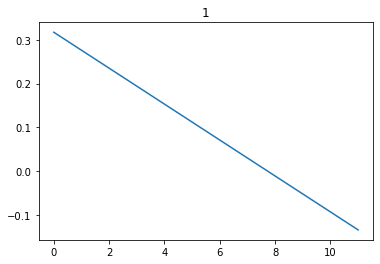

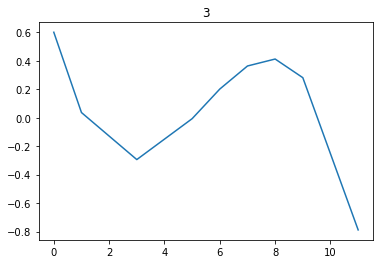

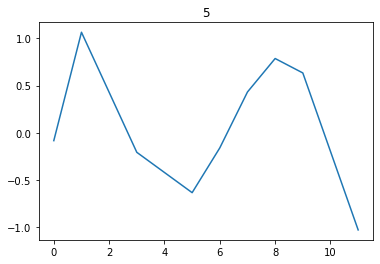

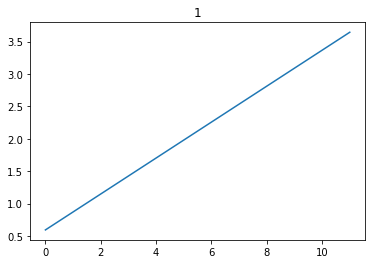

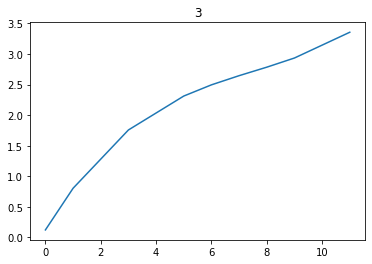

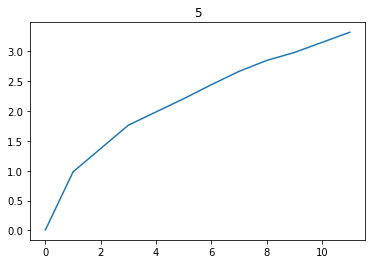

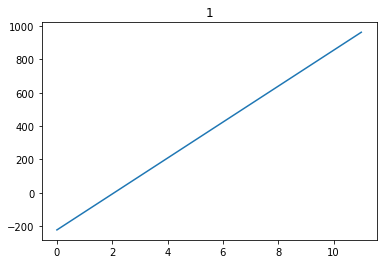

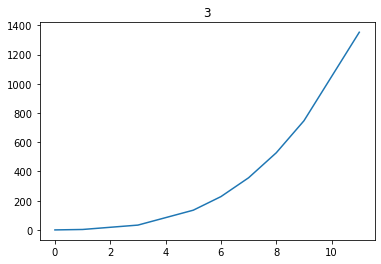

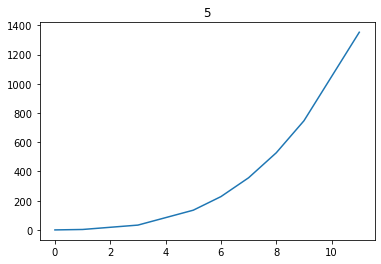

In [23]:
def approximateF(xs,ys,degree):
        poly=np.polyfit(xs, ys, degree, full=True)
        approximate = np.polyval(poly[0],xs)
        return approximate;

def show(xs,ys,degree):
    approximate=approximateF(xs,ys,degree)
    x_array = np.linspace(0,10,num=50)
    error=[]
    for i in range(0,len(approximate)):
        if ys[i]!=0 : error.append(abs(approximate[i]-ys[i])/ys[i])
    print("Estimated error is : ",np.sum(error)/len(error))
    plt.title(degree)
    plt.plot(xs,approximate)
    plt.show()

#Wykresy
print("Sinus function for 1/3/5 degree")
show(xs_sin, ys_sin,1)
show(xs_sin, ys_sin,3)
show(xs_sin, ys_sin,5)
print("Sqrt function for 1/3/5 degree")
show(xs_sqrt, ys_sqrt,1)
show(xs_sqrt, ys_sqrt,3)
show(xs_sqrt, ys_sqrt,5)
print("Polynomial function for 1/3/5 degree")
show(xs_add_pow, ys_add_pow,1)
show(xs_add_pow, ys_add_pow,3)
show(xs_add_pow, ys_add_pow,5)

Z prowadzonych badań możemy wywnioskować, że funkcja aproksymacji z wykorzystaniem bibliotek scipy i numpy jest dokładniejsza od 
funkcji napisanej ręcznie.

